In [2]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [1]:
import requests
import json
#from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
#url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'


In [5]:
#vacancies = res.json()
#num_pages = vacancies.get('pages')
#vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [3]:
from dateutil.parser import parse
strin = '2021-04-13T17:54:51+0300'
dt = parse(strin)
print(dt.isoformat())
print(dt.weekday())

2021-04-13T17:54:51+03:00
1


In [4]:
#Для проверки
def getSkills(id):
    url = f"https://api.hh.ru/vacancies/{id}"
    body = requests.get(url).json().get("key_skills") #[{'name': 'Python'},{'name': 'Tensorflow'},{'name': 'PyTorch'}]
    list_with_skills = list(map(lambda x: x.get("name"), body)) #['Python', 'Tensorflow', 'PyTorch']
    return list_with_skills

getSkills("41137742")

['Python',
 'Tensorflow',
 'PyTorch',
 'Numpy',
 'Kafka',
 'Docker',
 'OpenShift',
 'Jenkins',
 'Ansible',
 'PostgreSQL',
 'GridGain',
 'ELK',
 'Jaeger',
 'Prometheus',
 'Grafana']

In [6]:
def getAllVacansies(city):
    main_df=pd.DataFrame()
    sber = '3529'
    page = 1
    num_per_page = 100
    end = False
    while (not end):
            url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={city}'
    
            res = requests.get(url)
            if (res.status_code == 200):
                #print(page)
                temp_df = make_df(res.json())
                #print(temp_df.shape)
                main_df = pd.concat([main_df, temp_df])
                #print(main_df.shape)
                page += 1
            else:
                end = True
            
    return main_df

def make_df(json):
    vacs_df = pd.DataFrame()
    vacs_df['id'] = [el.get('id') for el in json.get('items')]
    vacs_df['name'] = [el.get('name') for el in json.get('items')]
    vacs_df['published_at'] = [el.get('published_at') for el in json.get('items')]
    vacs_df['responsibility'] = [el.get('snippet').get('responsibility') for el in json.get('items')]
    vacs_df['skills'] = [getSkills(el.get('id')) for el in json.get('items')] #скиллы
     #переводим дату публикации в datetime и номер дня недели 0-пн: 6-вскр
    vacs_df["published_at"] = vacs_df["published_at"].map(lambda x: parse(x))
    vacs_df["published_at_date"] = vacs_df["published_at"].map(lambda x: x.date)
    vacs_df['published_at_wd'] = vacs_df["published_at"].map(lambda x: x.weekday())
    #для понимания добавим город 
    vacs_df['kod_city'] = [el.get('area').get('id') for el in json.get('items')]
    vacs_df['city'] = [el.get('area').get('name') for el in json.get('items')]
    return vacs_df

vacs_df = getAllVacansies(1)

In [9]:
vacs_df.head(10)

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
0,44468826,Frontend Developer (Сайт sberbank.ru),2021-05-11 10:31:41+03:00,Разработка фронтальной части крупнейшего банко...,[],2021-05-11,1,1,Москва
1,44468877,Ведущий юрисконсульт отдела защиты интересов Б...,2021-05-11 10:32:41+03:00,Осуществление правового сопровождения сложност...,[],2021-05-11,1,1,Москва
2,44533597,Менеджер по кросс-сейл продажам,2021-05-12 17:25:43+03:00,"Разработка, согласование и внедрение схем посл...","[Подготовка презентаций, MS Visio, телемеркети...",2021-05-12,2,1,Москва
3,44845317,Специалист по коммуникациям. Дивизион «Цифрова...,2021-05-24 17:46:02+03:00,Помощь команде коммуникаций в повышении узнава...,[],2021-05-24,0,1,Москва
4,44281150,Консультант,2021-05-27 14:49:20+03:00,"Узнает, зачем клиент пришел в банк, и направля...",[Консультирование],2021-05-27,3,1,Москва
5,43732367,Руководитель проектов,2021-06-02 14:06:49+03:00,"Управлять работой команды, вне зависимости от ...",[],2021-06-02,2,1,Москва
6,44706691,"Analytic, Sber CIB (Global Markets, Equity Cap...",2021-05-19 11:45:24+03:00,Participation in origination and execution of ...,"[MS PowerPoint, Английский язык, Market Resear...",2021-05-19,2,1,Москва
7,44654832,ESG Аналитик,2021-05-17 21:00:12+03:00,"Анализ ESG инициатив в мире и России, с фокусо...",[],2021-05-17,0,1,Москва
8,45054414,Графический дизайнер,2021-05-31 09:45:54+03:00,Подготовка презентаций для внутренних выступле...,[],2021-05-31,0,1,Москва
9,44625375,Специалист по взысканию задолженности,2021-05-17 10:31:36+03:00,Сопровождение кредитного портфеля по просрочен...,[],2021-05-17,0,1,Москва


In [8]:
vacs_df.shape

(1417, 9)

In [12]:
var=2
while var <= 5555:
    temps_df = getAllVacansies(var)
    vacs_df= pd.concat([vacs_df, temps_df])
    var+=1
    print (var)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
vacs_df.shape

(10958, 9)

In [16]:
vacs_df.head(20)

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
0,44468826,Frontend Developer (Сайт sberbank.ru),2021-05-11 10:31:41+03:00,Разработка фронтальной части крупнейшего банко...,[],2021-05-11,1,1,Москва
1,44468877,Ведущий юрисконсульт отдела защиты интересов Б...,2021-05-11 10:32:41+03:00,Осуществление правового сопровождения сложност...,[],2021-05-11,1,1,Москва
2,44533597,Менеджер по кросс-сейл продажам,2021-05-12 17:25:43+03:00,"Разработка, согласование и внедрение схем посл...","[Подготовка презентаций, MS Visio, телемеркети...",2021-05-12,2,1,Москва
3,44845317,Специалист по коммуникациям. Дивизион «Цифрова...,2021-05-24 17:46:02+03:00,Помощь команде коммуникаций в повышении узнава...,[],2021-05-24,0,1,Москва
4,44281150,Консультант,2021-05-27 14:49:20+03:00,"Узнает, зачем клиент пришел в банк, и направля...",[Консультирование],2021-05-27,3,1,Москва
5,43732367,Руководитель проектов,2021-06-02 14:06:49+03:00,"Управлять работой команды, вне зависимости от ...",[],2021-06-02,2,1,Москва
6,44706691,"Analytic, Sber CIB (Global Markets, Equity Cap...",2021-05-19 11:45:24+03:00,Participation in origination and execution of ...,"[MS PowerPoint, Английский язык, Market Resear...",2021-05-19,2,1,Москва
7,44654832,ESG Аналитик,2021-05-17 21:00:12+03:00,"Анализ ESG инициатив в мире и России, с фокусо...",[],2021-05-17,0,1,Москва
8,45054414,Графический дизайнер,2021-05-31 09:45:54+03:00,Подготовка презентаций для внутренних выступле...,[],2021-05-31,0,1,Москва
9,44625375,Специалист по взысканию задолженности,2021-05-17 10:31:36+03:00,Сопровождение кредитного портфеля по просрочен...,[],2021-05-17,0,1,Москва


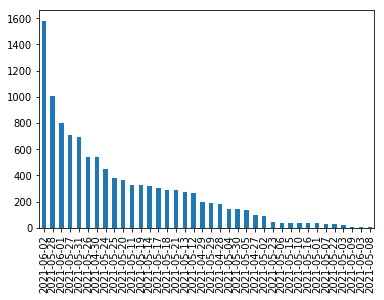

In [18]:
import matplotlib.pyplot as plt
#график по дате
pd.value_counts(vacs_df['published_at_date']).plot.bar();

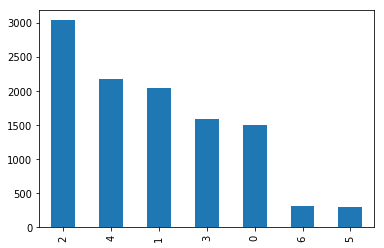

In [19]:
#график по дням недели ср и пт чаще всего вакансии размещаются
pd.value_counts(vacs_df['published_at_wd']).plot.bar();

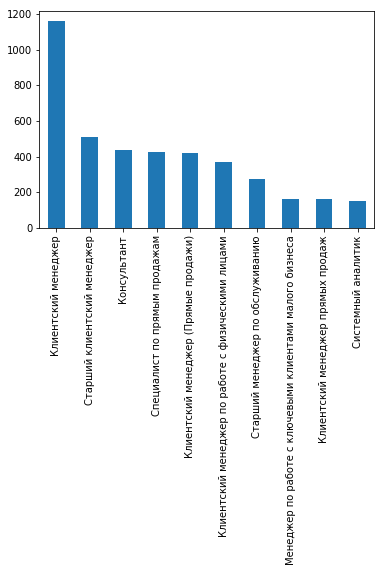

In [20]:
#Топ 10 вакансий чаще встречающихся
vacs_df['name'].value_counts().head(10).plot.bar();

In [21]:
t1=vacs_df.name.str.lower().str.contains('python')
t2=vacs_df.name.str.lower().str.contains('питон')
vacs_df[t1 | t2]

,id,name,published_at,responsibility,skills,published_at_date,published_at_wd,kod_city,city
23,44895644,Python/JS разработчик (Навыки для виртуального...,2021-05-26 10:15:00+03:00,Технологический стэк: Интеграция с внешними се...,"[Python, Django Framework, Git, Atlassian Jira...",2021-05-26,2,1,Москва
31,44915932,Python-разработчик,2021-06-02 11:23:22+03:00,Написание микросервисов для голосовых ассистен...,"[Python, Git, Asyncio]",2021-06-02,2,1,Москва
63,43760879,Python разработчик (SberWorks),2021-05-12 11:43:28+03:00,"Разработка, запуск и сопровождение разрабатыва...","[Python, Git, PostgreSQL, Linux, MySQL]",2021-05-12,2,1,Москва
75,44536394,Python разработчик в SberDevices (b2e),2021-05-31 09:53:07+03:00,Работа над уникальными проектами компании. Выс...,"[Python, Haskell, Django Framework, AsyncIO, P...",2021-05-31,0,1,Москва
37,42117693,Разработчик Python,2021-05-30 10:04:56+03:00,Разработка Backend сервисов и компонент портал...,"[Python, PostgreSQL, SQL, REST, C++]",2021-05-30,6,1,Москва
...,...,...,...,...,...,...,...,...,...
90,41058653,TeamLead Python-разработчик в SberDevices (нап...,2021-05-31 09:54:05+03:00,"Руководство командой разработки микросервиса, ...","[Python, API, PostgreSQL]",2021-05-31,0,1,Москва
94,44984138,Python разработчик (Виртуальный персональный ф...,2021-05-28 14:16:17+03:00,Решение прикладных и продуктовых задач NLP. Ра...,"[Atlassian Jira, SQL, Atlassian Confluence, Py...",2021-05-28,4,1,Москва
98,42667366,Senior Python разработчик в SberDevices (коман...,2021-05-31 09:53:47+03:00,Развитие продукта Brain. Создание новых моделе...,[],2021-05-31,0,1,Москва
4,41032029,Python разработчик в SberDevices (направление ...,2021-05-31 09:54:07+03:00,Задачи: разработка и сборка кастомизированных ...,"[Python, SQL]",2021-05-31,0,1,Москва


In [22]:
vacs_df[t1 | t2].skills

23    [Python, Django Framework, Git, Atlassian Jira...
31                               [Python, Git, Asyncio]
63              [Python, Git, PostgreSQL, Linux, MySQL]
75    [Python, Haskell, Django Framework, AsyncIO, P...
37                 [Python, PostgreSQL, SQL, REST, C++]
                            ...                        
90                            [Python, API, PostgreSQL]
94    [Atlassian Jira, SQL, Atlassian Confluence, Py...
98                                                   []
4                                         [Python, SQL]
29    [Python, Django Framework, Asyncio, PostgreSQL...
Name: skills, Length: 113, dtype: object

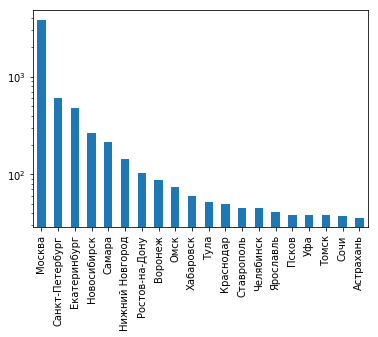

In [23]:
#Топ 20 городов с самым большим количеством вакансий
vacs_df['city'].value_counts().head(20).plot(kind='bar', logy=True);

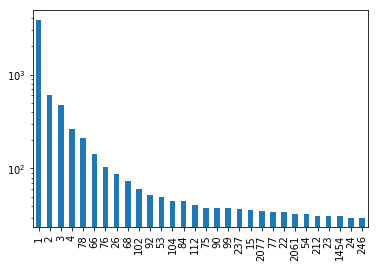

In [24]:
#Топ 30 городов с самым большим количеством вакансий по кодам, чтобы потом выбирать из списка
vacs_df['kod_city'].value_counts().head(30).plot(kind='bar', logy=True);